# Classification manuelle

Ce nootebook sert a voir comment les humains sont capables de classifier les differents produits de Rakuten afin de le comparer avec les modèles Deep learning.

Bibliotheques utilisés:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur

from sklearn.metrics import classification_report

import os #Miscellaneous operating system interfaces
import cv2 #import OpenCV

from sklearn import metrics
import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline
import itertools # Pour créer des iterateurs

#https://docs.python.org/3/library/os.html
#get current working directory
path = os.getcwd() + '/images/image_train'

y_organised = ['10','2280','2403','2705','2522',
               '40','50','2905','2462','60',
               '1280','1281','1300','1180','1140','1160',
               '1320','1560',
               '2582','2583','2585','1302','2220',
               '1920','2060',
               '1301','1940'
              ]

classes = {
            #Livres
            '10':' Livres type romain, Couvertures de livres ',
           '2280':' Livres, journaux et revues anciennes',
           '2403':' Livres, BD et revues de collection',
           '2705':' Livres en général',
           '2522':' Cahiers, carnets, marque pages',

            #Jeux
           '40':' Jeux videos, CDs + mais aussi equipements, cables, etc. ',
           '50':' Equipements/complements consoles, gamers ',
           '2905':' Jeux vidéos pour PC',
           '2462':' Equipement jeux, jeux video, play stations',
           '60':' Consoles ',

            #Jouets & Figurines
           '1280':' Jouets pour enfants, poupées nounours, equipements enfants',
           '1281':' Jeux socitété pour enfants, Boites et autres, couleurs flashy',
           '1300':' Jeux techniques, Voitures/drones télécomandés, Equipement, petites machines ',
           '1180':' Figurines et boites ',   
           '1140':' Figurines, Personnages et objets, parfois dans des boites ',
            '1160':' Cartes collectionables, Rectangles, beaucoup de couleurs ',
           
            #Meubles
           '1320':' Matériel et meubles bébé poussettes, habits',
           '1560':' Meubles, matelas canapés lampes, chaises',
    
            #Equipements
            '2582':' Matériel, meubles et outils pour le jardin',
           '2583':' Equipements technique pour la maison et exterieur (piscines), produits',
           '2585':' Idem 2583:  Equipements technique pour la maison et exterieur (piscines), produits',
            '1302':' Equipements, Habits, outils, jouets, objets sur fond blanc',
            '2220':' Equipements divers pour animaux',
    
            #Déco
           '1920':' Oreillers, coussins, draps',
           '2060':' Décorations',
    
            #Autre
            '1301':' Chaussetes bébés, petites photos ',
           '1940':' Alimentations, conserves boites d gateaux',

          }

Importer les differents produits:

In [3]:
X = pd.read_csv('X_train_update.csv',index_col=0)
y = pd.read_csv('Y_train_CVw08PX.csv',index_col=0).squeeze().map(str)

#Create a column with the name of the picture
X['image_name'] = 'image_' + X['imageid'].map(str) + '_product_' + X['productid'].map(str) + '.jpg'
X['image_path'] = path + r'/image_' + X['imageid'].map(str) + '_product_' + X['productid'].map(str) + '.jpg'

Definition des fonctions utilisées:

In [4]:
def show_image(i):
    
    img = cv2.imread(path + '/' + X.iloc[i]['image_name'].item())
    img = cv2.resize(img, (560, 560), interpolation=cv2.INTER_CUBIC)

    plt.figure(figsize = (6,6))
    plt.subplot(1,1,1)


    plt.axis('off')
    plt.imshow(img, cmap=cm.binary, interpolation='None')
    #plt.title("Classifiez l'image suivante");

In [5]:
def show_text(i):
    print('Designation:',X['designation'][i].item())
    print('Description:',X['description'][i].item())
    print

In [6]:
def show_concat(i):
    show_text(i)
    show_image(i)

In [7]:
def show_product():
    i = np.random.choice(len(X), size = 1)
    j = np.random.choice(3, size = 1)

    print("Essayez de classifier le produit dans la bonne classe")
    print('')
    print("Les classes sont listés au début de ce nootebook")
    print('')

    if j == 0:
        print('SEULMENT DONNEES IMAGE')
        print('')
        show_image(i)
        type_pred = 'image'
    elif j ==1:
        print('SEULMENT DONNEES TEXTE')
        print('')
        show_text(i)
        type_pred = 'texte'
    else:
        print('DONNEES TEXTE ET IMAGE')
        print('')
        show_concat(i)
        type_pred = 'concat'
    return i[0], type_pred

In [8]:
def classification_manuelle(i,type_pred):
    man_cla = pd.read_csv('Manual_classification.csv',index_col=0)

    prediction = input("Classifiez le produit")
    print('')

    if prediction == y[i]:
        print('CORRECT!')
    else:
        print('ERREUR!')

    print('')
    print('Vraie classe: ' + y[i] + ' ; ' + classes[y[i]] \
        + '\n' + 'Votre prediction: ' + prediction + ' ; ' + classes[prediction])

    new_man_cla = man_cla.append({'y_reel':y[i],'y_pred':prediction,'type':type_pred,'idx_prod':str(i)},ignore_index=True)
    new_man_cla.to_csv('Manual_classification.csv')
    
    return prediction

In [9]:
def conf_matx(y_test,y_pred):
    #Réponse valable:
    #cnf_matrix = metrics.confusion_matrix(y_test,y_pred,labels=list(set(y_pred)))
    cnf_matrix = metrics.confusion_matrix(y_test,y_pred,labels=y_organised)
    y_organised

    pond_matrix = []
    for line in cnf_matrix:
        pond_line = []
        for cell in line:
            pond_line.append(round(cell/sum(line),2))
        pond_matrix.append(pond_line)
        #print(sum(line))
        #print(sum(pond_line))
    cnf_matrix = np.array(pond_matrix)

    ###Optionnel: Afficher une matrice de confusion sous forme de tableau coloré
    #classes = set(y_pred)
    classes = y_organised

    plt.figure(figsize=(17,17))

    plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
    plt.title("Matrice de confusion")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    #tick_marks = set(y_test)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

    plt.ylabel('Vrais labels')
    plt.xlabel('Labels prédits')
    plt.show()

# Classification (C'est ici que tout ce passe)

Ce code montre le produit suivant à classifier manuellement. 
Il va nous demander de classifier le produit soit:
- Seulement avec le texte
- Seulement avec l'image
- Avec text et image

L'objectif est de pouvoir comparer nos performances avec celles de nos modèles

Essayez de classifier le produit dans la bonne classe

Les classes sont listés au début de ce nootebook

SEULMENT DONNEES IMAGE



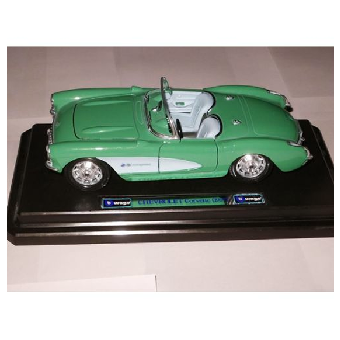

In [19]:
i,type_pred = show_product()

In [20]:
#LA PREDICTION C'EST ICI!!!

prediction = classification_manuelle(i,type_pred)

Classifiez le produit 1300



ERREUR!

Vraie classe: 1280 ;  Jouets pour enfants, poupées nounours, equipements enfants
Votre prediction: 1300 ;  Jeux techniques, Voitures/drones télécomandés, Equipement, petites machines 


# Calcule ton score!

Calcule ton score! Es-tu mieux que nos modèles?

Pour l'instant j'ai mergé les résultats (image seul, texte seul, concat). 

A terme, quand j'aurai les csv de tout l'équipe, je vais les séparer afin de pouvoir comparer avec ceux de nos modèles.

/Users/Ragdehl/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Ragdehl/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-9-168036e09d83>:11: RuntimeWarning: invalid value encountered in long_scalars
  pond_line.append(round(cell/sum(line),2))


              precision    recall  f1-score   support

          10       0.00      0.00      0.00         3
          40       0.33      0.50      0.40         2
          50       0.00      0.00      0.00         1
          60       0.00      0.00      0.00         0
        1140       0.75      0.38      0.50         8
        1160       1.00      0.33      0.50         3
        1180       0.20      1.00      0.33         1
        1280       0.40      0.29      0.33         7
        1281       1.00      0.50      0.67         2
        1300       0.67      0.80      0.73         5
        1301       0.50      1.00      0.67         1
        1302       0.00      0.00      0.00         0
        1320       0.75      0.43      0.55         7
        1560       1.00      0.75      0.86         4
        1920       1.00      0.62      0.77         8
        2060       0.22      0.50      0.31         4
        2220       1.00      0.50      0.67         2
        2280       0.00    

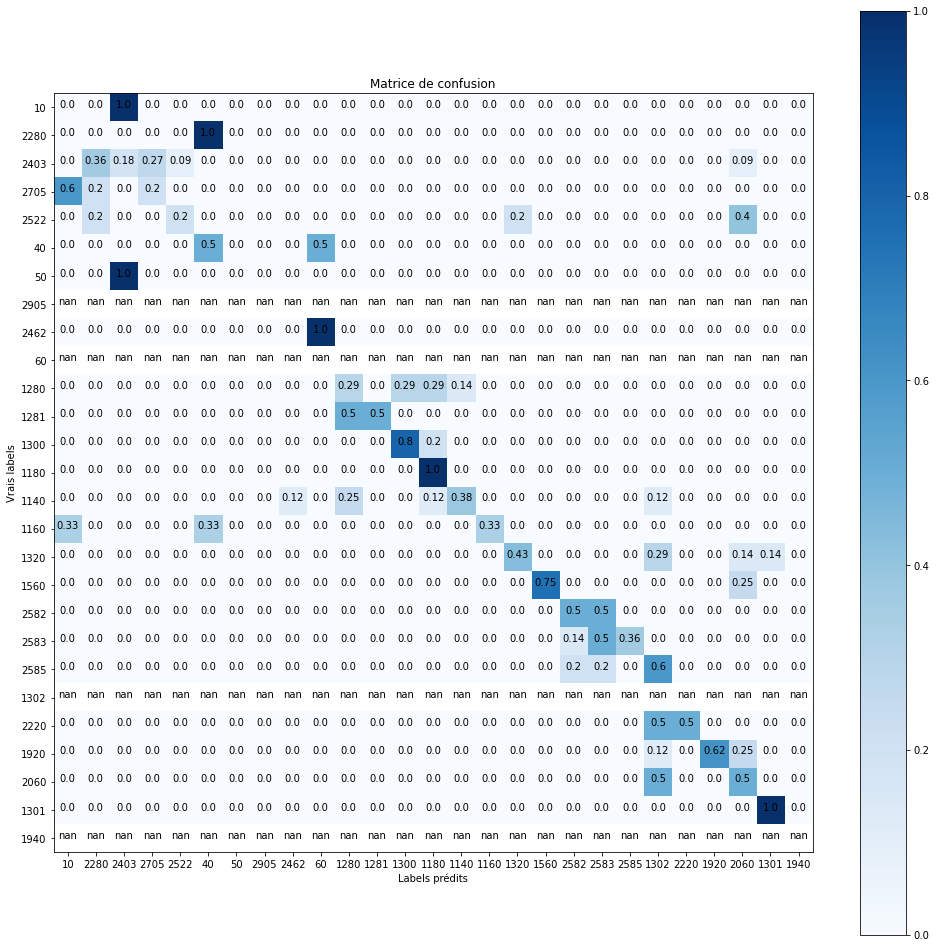

In [21]:
y_true = pd.read_csv('Manual_classification.csv',index_col=0)['y_reel']
y_pred = pd.read_csv('Manual_classification.csv',index_col=0)['y_pred']
y_organised = [int(i) for i in y_organised]


print(classification_report(y_true,y_pred))

conf_matx(y_true,y_pred) #montre les résultats en pourcentages!